Our task is to predict whether a bank currency note is authentic or not based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image. This is a binary classification problem and we will use SVM algorithm to solve this problem. Use different SVM kernels and find best classification accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\sanjay\Desktop\Analytics Vidya\Python\MACHINE LEARNING\ML Assignments\bill_authentication.csv")

In [3]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.shape

(1372, 5)

In [5]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(1348, 5)

In [8]:
## 1. Analyze Missing value
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]
print(len(feature_nan))

0


In [9]:
conti_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(len(conti_feature))

5


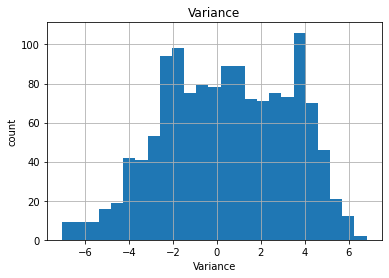

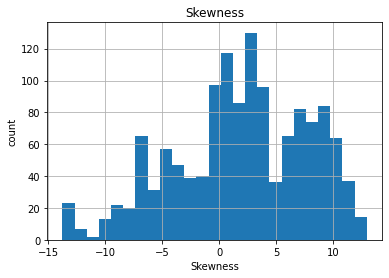

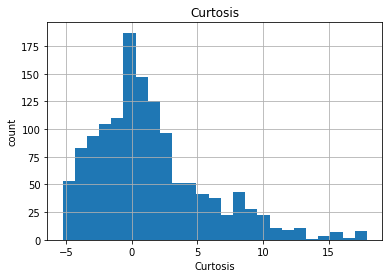

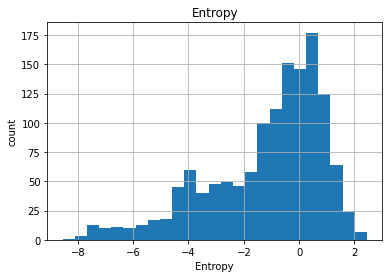

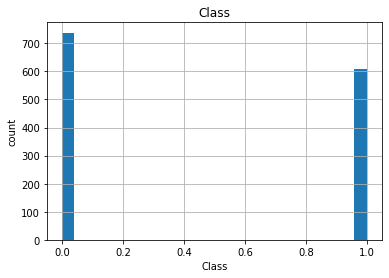

In [10]:
#analyzed the conti variable by creating histograms to understand there distribution
for feature in conti_feature:
    df[feature].hist(bins = 25)  
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [11]:
df["Class"].value_counts() 

0    738
1    610
Name: Class, dtype: int64

In [12]:
df["Class"].value_counts(normalize = True) #normalize = True print proportion instead of number

0    0.547478
1    0.452522
Name: Class, dtype: float64

<AxesSubplot:ylabel='Frequency'>

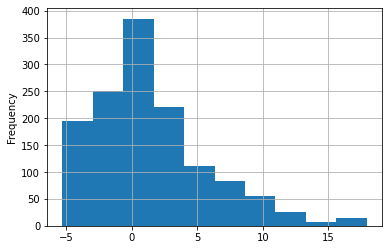

In [13]:
df['Curtosis'].plot.hist(grid = True) #right skewed

In [14]:
df['Curtosis'] = np.sqrt(df['Curtosis'])

C:\Users\sanjay\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,NaN,-0.44699,0
1,4.54590,8.1674,NaN,-1.46210,0
2,3.86600,-2.6383,1.387155,0.10645,0
3,3.45660,9.5228,NaN,-3.59440,0
4,0.32924,-4.4552,2.138177,-0.98880,0


In [16]:
conti_feature

['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

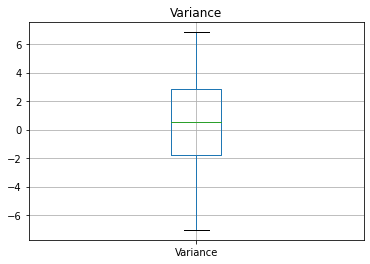

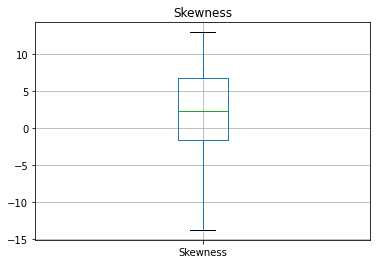

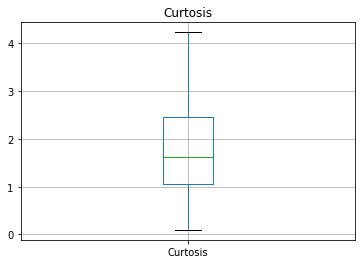

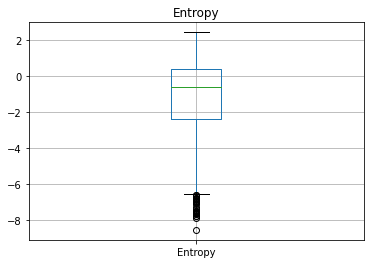

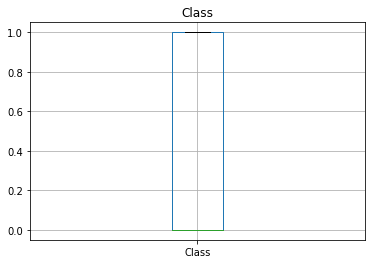

In [17]:
# #analyzed presence of outlier in conti by creating boxplot to understand there distribution
for feature in conti_feature:  
    df[feature].plot.box(grid = True)
    plt.title(feature)
    plt.show()

In [18]:
df = df[df['Entropy'] > -5.6]

<AxesSubplot:>

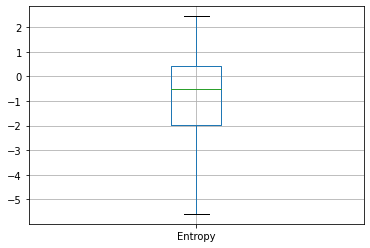

In [19]:
df['Entropy'].plot.box(grid = True)

In [20]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,NaN,-0.44699,0
1,4.54590,8.1674,NaN,-1.46210,0
2,3.86600,-2.6383,1.387155,0.10645,0
3,3.45660,9.5228,NaN,-3.59440,0
4,0.32924,-4.4552,2.138177,-0.98880,0


In [21]:
df.isnull().sum()

Variance      0
Skewness      0
Curtosis    543
Entropy       0
Class         0
dtype: int64

In [22]:
df = df.dropna(axis=0)

In [23]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
2,3.86600,-2.6383,1.387155,0.10645,0
4,0.32924,-4.4552,2.138177,-0.98880,0
6,3.59120,3.0129,0.853745,0.56421,0
7,2.09220,-6.8100,2.909227,-0.60216,0
11,3.98990,-2.7066,1.547450,0.86291,0


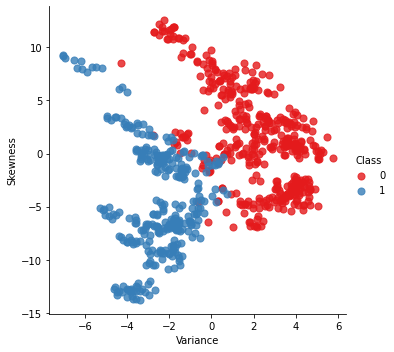

In [24]:
sns.lmplot('Variance','Skewness',data=df,hue='Class',palette='Set1',fit_reg=False,scatter_kws={'s':50})

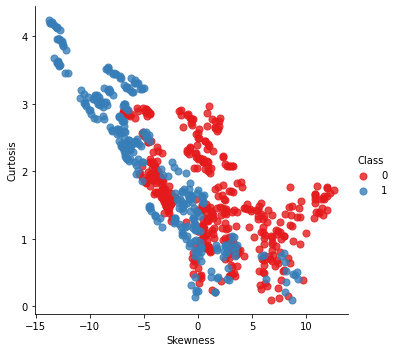

In [25]:
sns.lmplot('Skewness','Curtosis',data=df,hue='Class',palette='Set1',fit_reg=False,scatter_kws={'s':50})

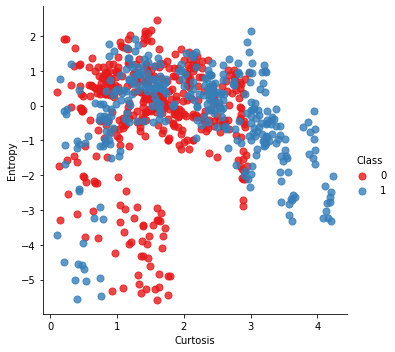

In [26]:
sns.lmplot('Curtosis','Entropy',data=df,hue='Class',palette='Set1',fit_reg=False,scatter_kws={'s':50})

In [27]:
X = df.drop('Class',axis=1)#feature

In [28]:
y = df['Class']#target 

In [29]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
model = SVC(kernel='linear',C=30,gamma='auto') #fit model on training data and chcek score of test data
model.fit(train_X,train_y)
model.score(test_X, test_y)

1.0

In [32]:
kernels = ['rbf', 'linear']    #automated the precoess and checked for all values of kernels and C value
C = [1,10,20,30,40,50]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(SVC(kernel=kval,C=cval,gamma='auto'),train_X, train_y, cv=10)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.998076923076923,
 'rbf_10': 1.0,
 'rbf_20': 1.0,
 'rbf_30': 1.0,
 'rbf_40': 1.0,
 'rbf_50': 1.0,
 'linear_1': 0.998076923076923,
 'linear_10': 1.0,
 'linear_20': 1.0,
 'linear_30': 1.0,
 'linear_40': 1.0,
 'linear_50': 1.0}

In [33]:
from sklearn.model_selection import RandomizedSearchCV #it also automate d processs like above step but here no loop is req.
rs = RandomizedSearchCV(SVC(gamma='auto'), {
        'C': [1,10,20,30],
        'kernel': ['rbf','linear']
    }, 
    cv=10, 
    return_train_score=False, 
    n_iter=4
)
rs.fit(train_X, train_y)
ds = pd.DataFrame(rs.cv_results_)
ds

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010534,0.002062,0.003615,0.001975,rbf,10,"{'kernel': 'rbf', 'C': 10}",1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000,1
1,0.006760,0.001974,0.003618,0.001207,linear,30,"{'kernel': 'linear', 'C': 30}",1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000,1
2,0.007191,0.001585,0.003639,0.001220,linear,10,"{'kernel': 'linear', 'C': 10}",1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000,1
3,0.010369,0.003796,0.004266,0.001290,rbf,1,"{'kernel': 'rbf', 'C': 1}",1.0,1.0,1.0,1.0,1.0,0.980769,1.0,1.0,1.0,1.0,0.998077,0.005769,4


In [34]:
ds[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,1.000000
1,30,linear,1.000000
2,10,linear,1.000000
3,1,rbf,0.998077


In [35]:
rs.best_params_

{'kernel': 'rbf', 'C': 10}

In [36]:
rs.best_score_

1.0

In [37]:
y_predict = model.predict(test_X)

In [38]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [39]:
S=pd.DataFrame({'Actual':test_y, 'Predicted':y_predict})  
S.head(30)

,Actual,Predicted
853,1,1
214,0,0
488,0,0
66,0,0
1127,1,1
961,1,1
1313,1,1
27,0,0
841,1,1
324,0,0


In [40]:
confusion_matrix = confusion_matrix(test_y, y_predict)
print(confusion_matrix)

[[134   0]
 [  0  91]]


In [41]:
print(classification_report(test_y, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00        91

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225

